In [12]:
import pandas as pd 
import numpy as np 
import sys
import os
import matplotlib.pyplot as plt

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Scripts'))

from data_loader import CSVDataloader, get_file_path
from Preprocessing import Preprocessing
from EDA import EDA

In [13]:
# Load credit data
data = get_file_path("oildata")
data_loader = CSVDataloader(data)
df = data_loader.load_data()

In [14]:
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,8-Nov-22,96.85
9007,9-Nov-22,93.05
9008,10-Nov-22,94.25
9009,11-Nov-22,96.37


In [3]:
# Display the first few rows and summary info
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


### Data Preprocessing

In [12]:
preprocessing = Preprocessing(df)

In [6]:
#preprocessing.Date_Transaformation()

### Handling Missing Values

In [4]:
preprocessing.Handling_missing_values()

Handling Missing Value is completed.


### Handling Duplicate Values

In [13]:
preprocessing.Handling_duplicate_values()

Handling Duplicate Value is completed.
Data preprocessing completed.


,Date,Price
0,1-Apr-02,26.06
1,1-Apr-03,27.94
2,1-Apr-04,32.59
3,1-Apr-05,54.14
4,1-Apr-08,98.69
...,...,...
9006,9-Sep-94,15.93
9007,9-Sep-96,22.25
9008,9-Sep-97,18.18
9009,9-Sep-98,12.53


### EDA

In [14]:
eda =EDA(df)

c:\Users\Specter\Documents\Tenx_Academy\Week-10\oil-price-event-analysis\Scripts\EDA.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['Date'] = pd.to_datetime(self.data['Date'])
c:\Users\Specter\Documents\Tenx_Academy\Week-10\oil-price-event-analysis\Scripts\EDA.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = self.data.resample('M', on='Date').mean().reset_index()


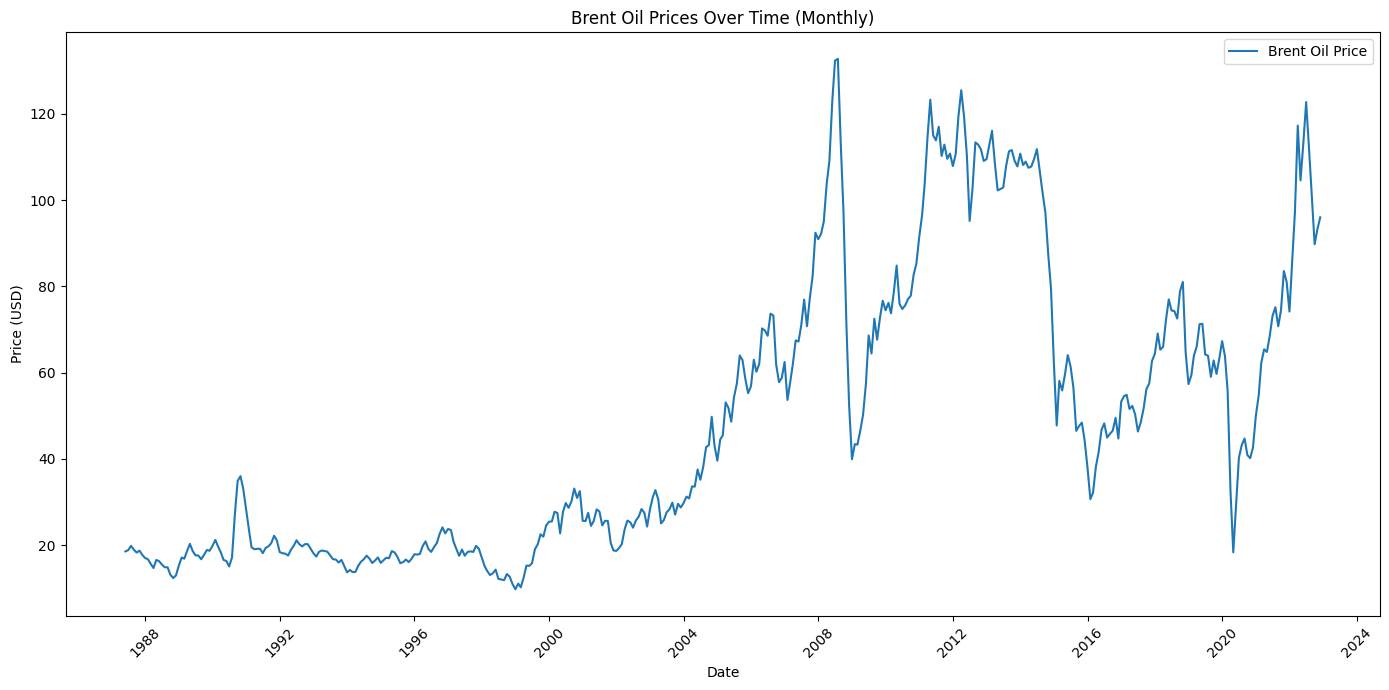

In [15]:
eda.time_series_analysis()

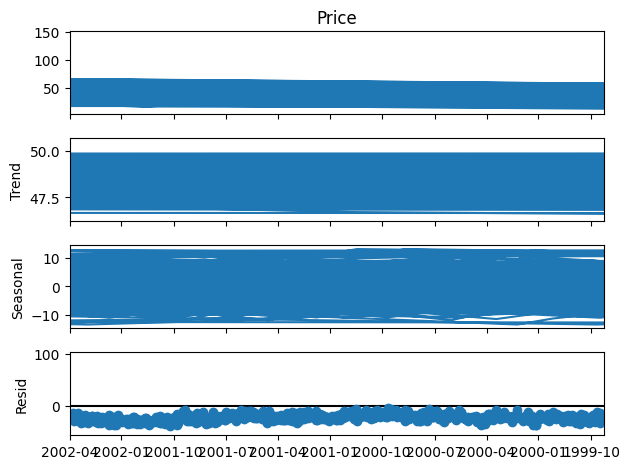

In [16]:
eda.plot_decomposition_results()

In [17]:
eda.Augmented_Dickey_Fuller_test()

ADF Statistic: -20.262660761833168
p-value: 0.0
The time series is stationary.


## Key Event Dataset

In [ ]:

# Recreate the event dataset
event_data = [
    ["First Gulf War Begins", "Conflict", "1990-08-02", "Middle East", "Iraq invades Kuwait, sparking a global oil supply concern."],
    ["Asian Financial Crisis", "Economic Shock", "1997-07-02", "Asia", "Severe financial crisis affects oil demand and investor confidence."],
    ["9/11 Terrorist Attacks", "Political Shock", "2001-09-11", "USA", "Attacks cause market panic and increased geopolitical risk."],
    ["Iraq War Begins", "Conflict", "2003-03-20", "Middle East", "US-led invasion of Iraq affecting oil exports and supply."],
    ["2008 Financial Crisis", "Economic Shock", "2008-09-15", "Global", "Lehman Brothers collapses; global demand for oil declines sharply."],
    ["Arab Spring Begins", "Political Conflict", "2010-12-17", "MENA", "Wave of uprisings in oil-producing countries affects stability."],
    ["Libya Civil War", "Conflict", "2011-02-15", "North Africa", "Major oil-exporting country sees production collapse due to war."],
    ["OPEC Output Cut Agreement", "OPEC Policy Change", "2016-11-30", "Global", "OPEC and non-OPEC members agree to reduce oil production."],
    ["US Sanctions on Iran (Reinstated)", "Sanction", "2018-11-05", "Middle East", "US reimposes sanctions on Iranian oil exports."],
    ["COVID-19 Pandemic Declared", "Economic Shock", "2020-03-11", "Global", "Global lockdowns lead to historic drop in oil demand."],
    ["OPEC+ Oil Price War Begins", "OPEC Policy Conflict", "2020-03-08", "Global", "Saudi Arabia and Russia flood market after talks fail."],
    ["Negative Oil Prices (WTI)", "Market Anomaly", "2020-04-20", "USA", "WTI crude hits negative prices for the first time."],
    ["Russia Invades Ukraine", "Conflict", "2022-02-24", "Eastern Europe", "Major war disrupts global energy supply chains."],
    ["Houthi Attacks on Saudi Oil Facilities", "Conflict", "2019-09-14", "Middle East", "Drone attacks temporarily cut Saudi oil output."],
    ["China's Economic Slowdown", "Economic Shock", "2015-07-01", "Asia", "Stock market crash raises concerns about oil demand from China."]
]

In [2]:
event_columns = ["event_name", "event_type", "start_date", "region", "description"]
events_df = pd.DataFrame(event_data, columns=event_columns)

In [4]:
# Convert date to datetime
events_df['start_date'] = pd.to_datetime(events_df['start_date'])

# Save to CSV
events_csv_path = "../Data/oil_market_events.csv"
events_df.to_csv(events_csv_path, index=False)

events_csv_path  # Return the file path for download

'../Data/oil_market_events.csv'

In [16]:
events_df = pd.read_csv("../Data/oil_market_events.csv")
events_df['start_date'] = pd.to_datetime(events_df['start_date'])

In [15]:
# Load and clean
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y", errors='coerce')  
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

# Resample with updated frequency
monthly_df = df['Price'].resample('ME').mean()

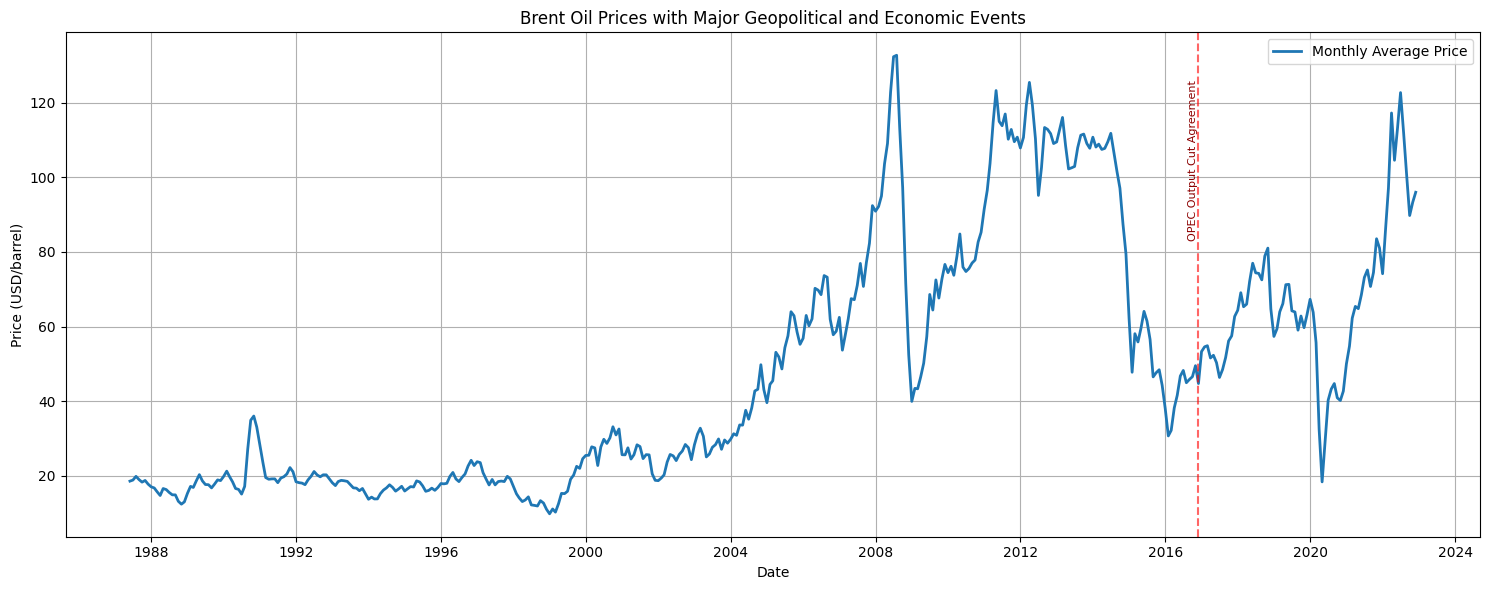

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(monthly_df, label='Monthly Average Price', linewidth=2)

# Annotate events
for _, row in events_df.iterrows():
    if row['start_date'] in monthly_df.index:
        plt.axvline(row['start_date'], color='red', linestyle='--', alpha=0.6)
        plt.text(row['start_date'], 
                 monthly_df.max()*0.95, 
                 row['event_name'], 
                 rotation=90, fontsize=8, va='top', ha='right', color='darkred')

plt.title("Brent Oil Prices with Major Geopolitical and Economic Events")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()